![title](OIP.jpg)

# Project and Data Description

This project was focused on building a music recommender system using LastFM 1K User dataset.

The dataset contains <user, artist, song, timestamp> tuples collected from Last.fm API ( http://www.last.fm/api ), using the user.getRecentTracks method ( http://www.last.fm/api/show?service=278 )

The dataset contains 19 million rows and 6 columns

## Disclaimer

### Due to some challenges encountered, this model is just a basic version of a recommender system. Additional improvements will be made going forward!

# Data Preprocessing

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%%time 

# load dataset
df_tsv = pd.read_csv('userid-timestamp-artid-artname-traid-traname.tsv', delimiter='\t', 
                     skiprows=[2120260-1, 2446318-1, 11141081-1,
                              11152099-1, 11152402-1, 11882087-1,
                              12902539-1, 12935044-1, 17589539-1])

# view dataset
df_tsv

CPU times: total: 1min 15s
Wall time: 4min 12s


,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,Unnamed: 4,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
0,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
1,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
2,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)
4,user_000001,2009-05-04T13:38:31Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,To Stanford (Live_2009_4_15)
...,...,...,...,...,...,...
19098847,user_001000,2008-01-27T22:02:35Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,a490cabc-1e5c-4807-86c7-740c31a50009,Please Be Patient With Me
19098848,user_001000,2008-01-27T21:56:52Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,3e92e447-9e1f-440d-bc00-6734469880c5,Shake It Off
19098849,user_001000,2008-01-27T21:52:36Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,93d044e6-1bbb-46a6-ac8e-283382a89e6f,Side With The Seeds
19098850,user_001000,2008-01-27T21:49:12Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,5ac4386f-6146-4389-a762-4b43f362d2c8,Sky Blue Sky


In [6]:
%%time

# add column names to df_tsv
col_name = ['user_id', 'timestamp', 'artist_id', 'artist_name', 'track_id', 'track_name']
df_tsv.columns = col_name

df_tsv['timestamp'] = pd.to_datetime(df_tsv.timestamp)
df_tsv.sort_values(['user_id', 'timestamp'], ascending=True, inplace=True)

#print extra details
print(f'Number of Records: {len(df_tsv):,}\nUnique Users: {df_tsv.user_id.nunique()}\nUnique Artists: {df_tsv.artist_id.nunique():,}')

# show new dataset
df_tsv.head(10)

Number of Records: 19,098,852
Unique Users: 992
Unique Artists: 107,295
CPU times: total: 1min 6s
Wall time: 2min 48s


,user_id,timestamp,artist_id,artist_name,track_id,track_name
16683,user_000001,2006-08-13 13:59:20+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,c4633ab1-e715-477f-8685-afa5f2058e42,The Launching Of Big Face
16682,user_000001,2006-08-13 14:03:29+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,bc2765af-208c-44c5-b3b0-cf597a646660,Zn Zero
16681,user_000001,2006-08-13 14:10:43+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,aa9c5a80-5cbe-42aa-a966-eb3cfa37d832,The Return Of Super Barrio - End Credits
16680,user_000001,2006-08-13 14:17:40+00:00,67fb65b5-6589-47f0-9371-8a40eb268dfb,Tommy Guerrero,d9b1c1da-7e47-4f97-a135-77260f2f559d,Mission Flats
16679,user_000001,2006-08-13 14:19:06+00:00,1cfbc7d1-299c-46e6-ba4c-1facb84ba435,Artful Dodger,120bb01c-03e4-465f-94a0-dce5e9fac711,What You Gonna Do?
16678,user_000001,2006-08-13 14:23:03+00:00,6b77d8ef-c405-4846-9d5f-2b93e6533101,Rei Harakami,777ac51f-8ffc-4c44-92b6-a2c75cbc6915,Joy
16677,user_000001,2006-08-13 14:44:23+00:00,6b77d8ef-c405-4846-9d5f-2b93e6533101,Rei Harakami,328913b8-f31f-4abf-976e-7641174f680b,Lust
16676,user_000001,2006-08-13 14:55:14+00:00,27613b78-1b9d-4ec3-9db5-fa0743465fdd,Herbie Hancock,8e81302a-6cde-4818-8703-43b5356ce0a0,The Essence
16675,user_000001,2006-08-13 14:59:59+00:00,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,1c0377bb-c00b-4bbe-b4b2-615f13324adc,Idioteque
16674,user_000001,2006-08-13 15:05:20+00:00,477d1c52-3100-4493-a049-473d8f183e23,高木正勝,8f916d23-0510-4ad5-9a7f-8a076c3f14ca,Change Of Seasons


In [7]:
# check shape of dataset
df_tsv.shape

(19098852, 6)

In [8]:
# check datatypes of cols
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19098852 entries, 16683 to 19080479
Data columns (total 6 columns):
 #   Column       Dtype              
---  ------       -----              
 0   user_id      object             
 1   timestamp    datetime64[ns, UTC]
 2   artist_id    object             
 3   artist_name  object             
 4   track_id     object             
 5   track_name   object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 1020.0+ MB


In [10]:
# select a subset of users
rand_users = df_tsv.user_id.unique()[::20]
print(f"Number of Unique users: {len(rand_users)}")

Number of Unique users: 50


In [11]:
%%time

# use subset dataset
user_sub = df_tsv.loc[df_tsv.user_id.isin(rand_users)].sort_values(['user_id', 'timestamp'])

#print extra details
print(f'Number of Records: {len(user_sub):,}\nUnique Users: {user_sub.user_id.nunique()}\nUnique Artists: {user_sub.artist_id.nunique():,}')

Number of Records: 776,335
Unique Users: 50
Unique Artists: 16,774
CPU times: total: 2.19 s
Wall time: 6.58 s


<Axes: >

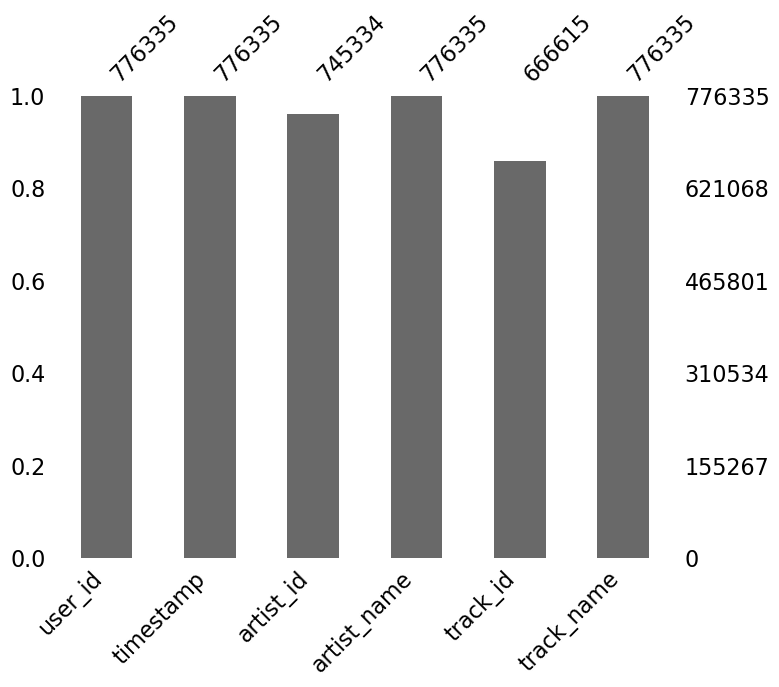

In [12]:
# check missing/null values
import missingno as msno

#plot missing/null values matrix
msno.bar(user_sub, figsize=(8,6))

In [13]:
# check null values
user_sub.isnull().sum()

user_id             0
timestamp           0
artist_id       31001
artist_name         0
track_id       109720
track_name          0
dtype: int64

In [14]:
# percentage of missing values
miss_percent = (user_sub.isnull().mean()) * 100
miss_percent

user_id         0.000000
timestamp       0.000000
artist_id       3.993250
artist_name     0.000000
track_id       14.133074
track_name      0.000000
dtype: float64

In [15]:
# drop unneeded columns
unnec_cols = ['artist_id', 'track_id', 'timestamp']
user_sub = user_sub.drop(user_sub[unnec_cols], axis=1)

# view dataset
user_sub

,user_id,artist_name,track_name
16683,user_000001,Plaid & Bob Jaroc,The Launching Of Big Face
16682,user_000001,Plaid & Bob Jaroc,Zn Zero
16681,user_000001,Plaid & Bob Jaroc,The Return Of Super Barrio - End Credits
16680,user_000001,Tommy Guerrero,Mission Flats
16679,user_000001,Artful Dodger,What You Gonna Do?
...,...,...,...
18885022,user_000989,Jon Bon Jovi,"Janie, Don'T Take Your Love To Town"
18885021,user_000989,Jon Bon Jovi,Midnight In Chelsea
18885020,user_000989,Jon Bon Jovi,Ugly
18885019,user_000989,Jon Bon Jovi,Staring At Your Window With A Suitcase In My Hand


# Data Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_6572\470793000.py:10: UserWarning: Glyph 37428 (\N{CJK UNIFIED IDEOGRAPH-9234}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_6572\470793000.py:10: UserWarning: Glyph 26449 (\N{CJK UNIFIED IDEOGRAPH-6751}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_6572\470793000.py:10: UserWarning: Glyph 20581 (\N{CJK UNIFIED IDEOGRAPH-5065}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_6572\470793000.py:10: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37428 (\N{CJK UNIFIED IDEOGRAPH-9234}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26449 (\N{CJK UNIFIED 

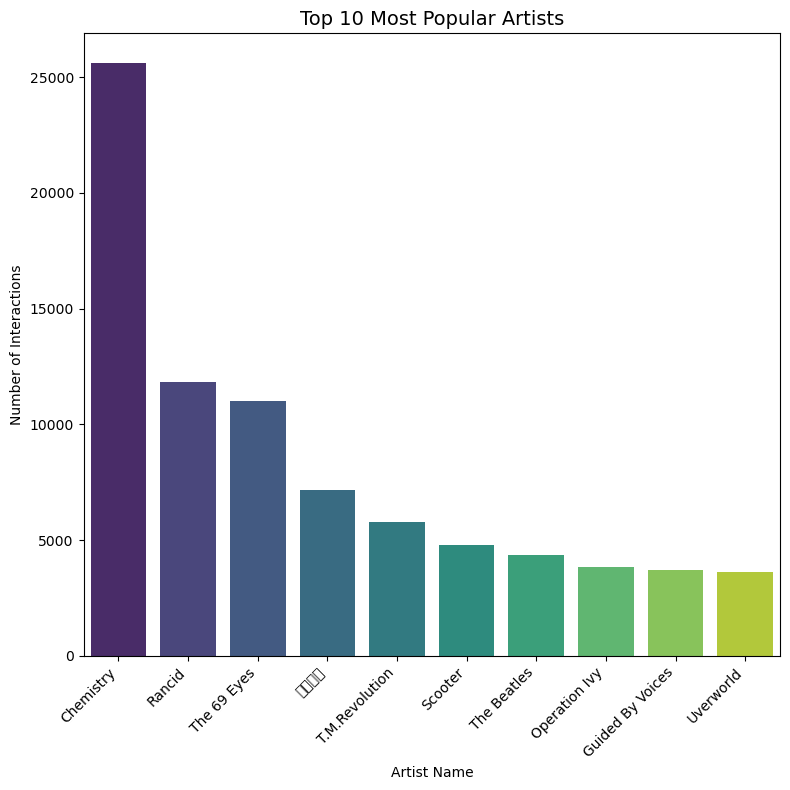

In [16]:
# Top 10 artists
top_10_arts = user_sub['artist_name'].value_counts().nlargest(10)

plt.figure(figsize=(8,8))
sns.barplot(x=top_10_arts.index, y=top_10_arts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Artist Name')
plt.ylabel('Number of Interactions')
plt.title('Top 10 Most Popular Artists', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6572\45463986.py:11: UserWarning: Glyph 12461 (\N{KATAKANA LETTER KI}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_6572\45463986.py:11: UserWarning: Glyph 12511 (\N{KATAKANA LETTER MI}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_6572\45463986.py:11: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_6572\45463986.py:11: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_6572\45463986.py:11: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_6572\45463986.py:11: UserWarning: Glyph 32004 (\N{CJK UNIFIED IDEOGRAPH-7D04}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\AppData

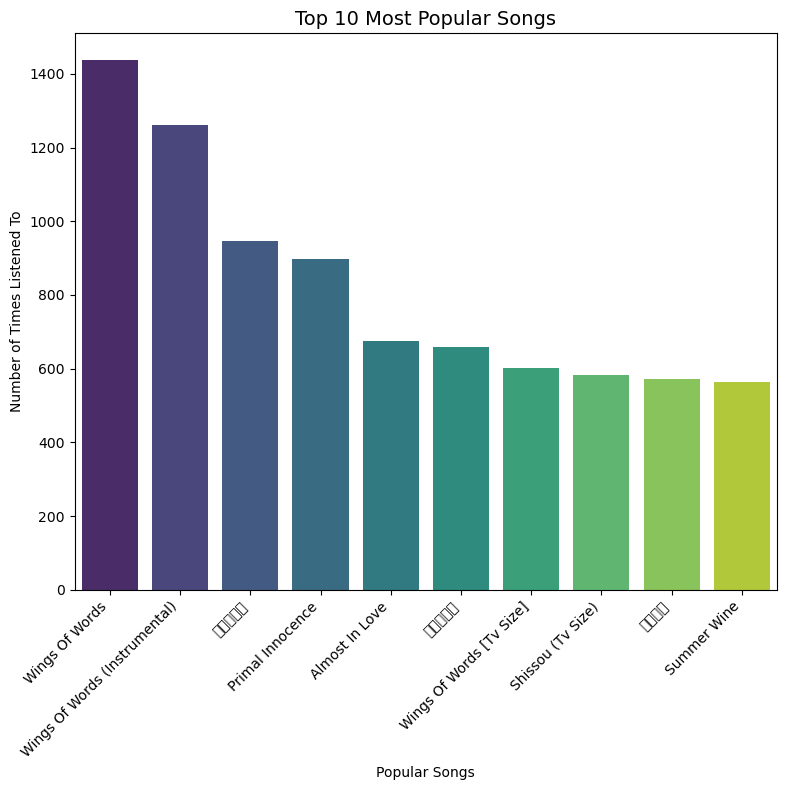

In [17]:
# Most Popular songs

top_10_songs = user_sub['track_name'].value_counts().nlargest(10)

plt.figure(figsize=(8,8))
sns.barplot(x=top_10_songs.index, y=top_10_songs.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Popular Songs')
plt.ylabel('Number of Times Listened To')
plt.title('Top 10 Most Popular Songs', fontsize=14)
plt.tight_layout()
plt.show()

# Data Transformation

In [18]:
# create a listen column
user_sub['listens'] = 1

# create user-item matrix
user_interaction_matrix = pd.pivot_table(user_sub, index='user_id', columns='track_name', values='listens', aggfunc='sum', 
                                    fill_value=0)

# view user_interaction_matrix
user_interaction_matrix.head(10)

track_name,! (Foreword),"# 173 - The Stills, Novillero, Fred Eaglesmith","# 174 - The Organ, Sloan, Jill Barber",#0006 (Full),#1,#1 Crush,#1 Hit Jam,#1 Hit Song,#1 Rule,#102 - Saskatoon Secret,...,Ｙｕｒａ Ｙｕｒａ,Ｚｅｒｏ Ｓｙｍｐａｔｈｙ,Ｚｉｐｓ（「機動戦士ガンダムＳｅｅｄ Ｍｓｖ」テーマソング）,～Sprout!～,～Toxic Gorilla～,～流れ・空虚・Ｔｈｉｓ Ｗｏｒｄ～,～Ｓｐｒｏｕｔ！～（インストゥルメンタル）,～Ｔｏｘｉｃ Ｇｏｒｉｌｌａ～（インストゥルメンタル）,､ﾏ､隕Vｪｺﾄﾁ,ｺﾏ覈
user_id,,,,,,,,,,,,,,,,,,,,,
user_000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user_000021,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
user_000041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user_000061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user_000081,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user_000101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user_000121,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user_000141,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,1,17,2,1,10,1
user_000161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Creation

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

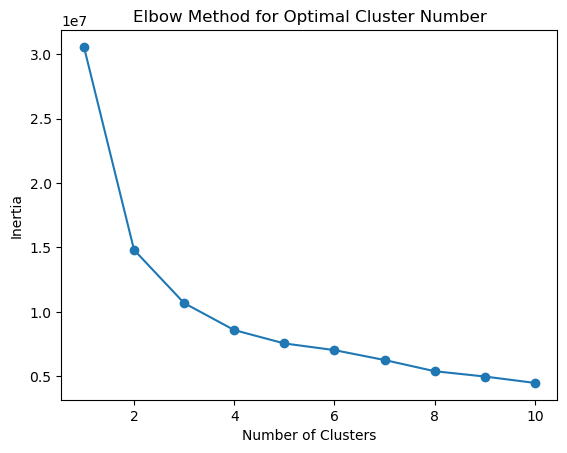

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Predict optimal K-means clusters
inertia = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10,
                    random_state=0)
    kmeans.fit(user_interaction_matrix)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method to show optimal number of clusters required
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

# Build Recommender System

### The system employed is the collaborative filtering user-item based model

In [27]:
def music_recommendation(user_id, num_recommendations):
    # Find the cluster that the user belongs to
    user_cluster = kmeans.predict(user_interaction_matrix.loc[user_id].values.reshape(1, -1))
    
    # Get the indices of the songs or artists in the cluster
    cluster_indices = user_interaction_matrix.index[kmeans.labels_ == user_cluster[0]]
    
    # Filter out the songs or artists that the user has already listened to
    recommendations = user_interaction_matrix.loc[cluster_indices, user_interaction_matrix.loc[user_id] == 0]
    
    # Sort the recommendations based on listens and get the top 'num_recommendations' songs or artists
    top_recommendations = recommendations.sum(axis=0).sort_values(ascending=False).head(num_recommendations)
    
    return top_recommendations.index.tolist()


user_id = 'user_000041' 
num_recommendations = 10
recommended_songs = music_recommendation(user, num_recommendations)
print(f"Recommended songs for {user_id}:")
print(recommended_songs)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Recommended songs for user_000041:
['Varme Dager', 'Reckoner', 'Ты Меня Любишь', 'Battlecry', 'Paper Planes', 'Liquor & Whores', 'Heroin', 'Before… (Vocal)', 'The Great Escape', 'This Charming Man']


# Evaluation

In [28]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
train_data, test_data = train_test_split(user_sub, test_size=0.2, random_state=42)

# Create a dictionary to store recommended songs for each user in the test set
recommended_songs_dict = {}

# Generate recommendations for each user in the test set
for user_id in test_data['user_id'].unique():
    recommended_songs = music_recommendation(user_id, num_recommendations)
    recommended_songs_dict[user_id] = recommended_songs



user_id_to_evaluate = 'user_000181'
actual_songs_listened = test_data[test_data['user_id'] == user_id_to_evaluate]['track_name'].tolist()
print(f"Actual songs listened by {user_id_to_evaluate}:")
print(actual_songs_listened)
print(f"Recommended songs for {user_id_to_evaluate}:")
print(recommended_songs_dict[user_id_to_evaluate])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with featu

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Actual songs listened by user_000181:
['El Chupa Nibre', 'Dear Abby', 'Do You Realize??', 'Viva Las Vegas', 'There Goes My Gun', 'The Heinrich Maneuver', 'Reefer Man', 'Surf Wax America', 'Rainbow Country (Dub Version)', 'Tropicalia', 'When Ya Get Drafted', 'Panic Attack', 'Dolly', 'Disarm', 'Dropped As A Child', 'The Specials - Ghost Town', 'The Conspiracy Song', 'Magic Number', 'Detective', 'Guns Of Brixton', 'Viva La Revolution (Live)', 'Supertouch/Shittfit', 'Love Song', 'Drinking And Driving', 'I Want It All', 'What Ever Happened?', 'New York', 'Marriage', "Smokin' Banana Peels", 'Death On The Stairs (New Recording)', 'Mesopotamia', "Ever Fallen In Love (With Someone You Shouldn'T'Ve)", 'Gcf', 'Coolidge', 'Song For Mary', 'Satyagraha', 'Hey You', 'Stars', 'Noise Brigade', 'End It On This', 'Of Moons, Birds & Monsters', 'Take Me Down', 'In My Head', 'My World', 'California Über Alles', "Don'T Let Me Down", 'Missing', 'My War', 'The Frog Prince', 'Dance With Me', 'Normal Like You', 